# [Kaggle - Titanic](https://www.kaggle.com/competitions/titanic/overview)
- Survived: 1(생존) / 0(사망)
- Pclass(Ticket class): 1(1등급) / 2(2등급) / 3(등급)
- SibSp(함께 탑승한 형제 및 배우자 수)
- Parch(함께 탑승한 자녀 및 부모 수)
- Fare: 승객이 지불한 요금
- Cabin: 객실 번호
- Embarked(탑승지 이름): C = Cherbourg, Q = Queenstown, S = Southampton

#### 참고 사이트
**[EDA 및 전처리]**  
[3. 캐글 - 타이타닉 생존자](https://right1203.github.io/study/2018/03/06/titanic_prediction/)  
[캐글 타이타닉 생존자 예측 도전기 (1)](https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html)  
[[머신러닝 기초] 타이타닉 생존율 분석 - EDA #1 데이터 내용 및 객실등급(Pclass), 성별(Sex)확인](https://www.kangtaeho.com/89)  
[파이썬을 이용한 탐색적 분석 EDA(Exploratory Data Analysis) 02](https://velog.io/@raffier/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%ED%83%90%EC%83%89%EC%A0%81-%EB%B6%84%EC%84%9D-EDAExploratory-Data-Analysis-02)  
[kaggle 타이타닉 EDA](https://iludaslab.tistory.com/entry/kaggle-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-EDA)  
[[Kaggle] Titanic 생존자 예측 (1) EDA](https://mintaewon.github.io/2020/12/kaggle-titanic-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1-1-eda/)  
[Titanic with EDA](https://velog.io/@hyungraelee/Titanic-with-EDA#2-feature-engineering-and-data-cleaning)  
[Kaggle - titanic(타이타닉) : EDA](https://steadiness-193.tistory.com/207)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rc('font',family = 'Malgun Gothic') # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 음수(-) 기호 표시
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 살펴보기

In [10]:
# train data 불러오기
train = pd.read_csv('C:/Users/user/Desktop/Python/adp/1. kaggle/data/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 기술통계량 확인 ("PassengerId" 컬럼 제외)
train.describe().drop(columns = 'PassengerId')

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 컬럼별 결측치 확인
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 중복 데이터 개수 확인 -> 없음
train.duplicated().sum()

0

### 2. EDA

In [3]:
# 필요 없는 컬럼명 제외
df = train[train.columns.difference(['PassengerId', 'Name', 'Ticket', 'Cabin'])]
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0


Cabin 칼럼은 전체 891개 中 687의 결측치(77%)가 있으므로 분석 대상에서 제외함.

#### 1) Age

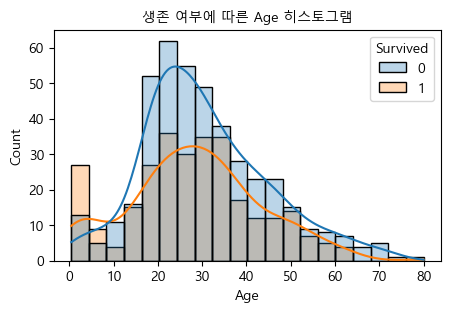

In [8]:
# age ~ survived
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Age', hue='Survived', alpha=.3, kde=True)
plt.title('생존 여부에 따른 Age 히스토그램', fontsize=10)
plt.show()

- 20~30대에서 사망자, 생존자 수가 상대적으로 많음.
- 영유아층(0세~8세)은 사망자보다 생존자 수가 더 많았음.
- 영유아를 제외하고는 사망자와 생존자 분포가 비슷함.

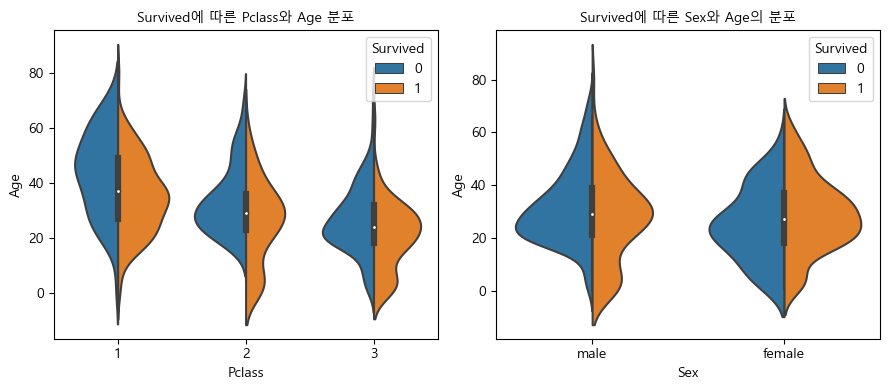

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

# plt.figure(figsize=(5,3))
sns.violinplot(data=df, x = 'Pclass', y='Age', hue='Survived', split=True, ax=ax[0]) # 데이터의 분포와 범위를 한 눈에 볼 수 있음.
ax[0].set_title('Survived에 따른 Pclass와 Age 분포', fontsize=10)

sns.violinplot(data=df, x = 'Sex', y='Age', hue='Survived', split=True, ax=ax[1]) # 데이터의 분포와 범위를 한 눈에 볼 수 있음.
ax[1].set_title('Survived에 따른 Sex와 Age의 분포', fontsize=10)

plt.tight_layout()
plt.show()

[(좌측) 해석]
- Pclass 등급이 낮아질수록(1 → 3) 사망자에 대한 Age 분포가 낮은 연령대로 치우쳐짐.
- Pclass=1
    - 사망자는 약 40 ~ 50대에서 가장 많으며, 생존자는 약 20 ~ 30대에서 가장 많음
- Pclass=2
    - 생존자는 약 30대에 가장 많으며, 사망자도 마찬가지로 30대에 가장 많고, 두 번째로는 영유아에 많음.
- Pclass=3
    - 생존자는 약 20대에 가장 많으며, 사망자도 Pclass=2와 비슷한 분포를 보임.
    
[(우측) 해석]
- 남성
    - 사망자: 대략 20대 ~ 30대에서 높게 나옴.
    - 생존자: 대략 30대와 영유아에서 높게 나옴.
- 여성
    - 사망자: 남성과 비슷하지만, 남성은 10대부터 사망자가 급격하게 증가하지만 여성은 영유아부터 점진적으로 증가하는 형태임.
    - 생존자: 대략 20대~40대에서 높게 나타남.

#### 2) Pclass

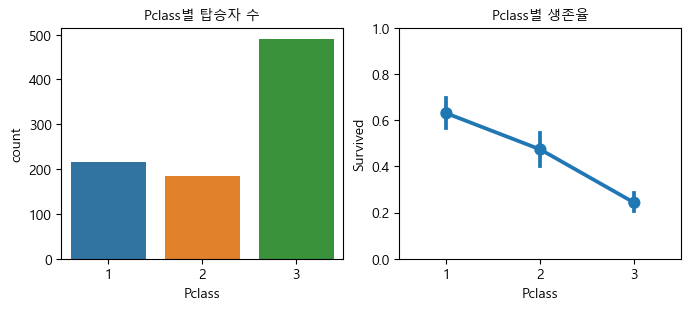

<Figure size 500x300 with 0 Axes>

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8,3))

sns.countplot(x=df.Pclass, ax=ax[0])
ax[0].set_title('Pclass별 탑승자 수', fontsize=10)

# pclass ~ survived
plt.figure(figsize=(5,3))
sns.pointplot(data=df, x='Pclass', y='Survived', ax=ax[1])
ax[1].set_title('Pclass별 생존율', fontsize=10)
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

[해석]
- Pclass = 3인 탑승자 수가 가장 많지만 생존율은 가장 낮음.

In [11]:
# Pclass별 생존율
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[해석]
- Plcass 등급이 낮을수록 생존율은 감소함.

In [12]:
# 카이제곱 검정(독립성 검정)
# 귀무가설: 두 변수는 서로 독립이다.
# 대립가설: 두 변수는 서로 독립이 아니다.

df_cross = pd.crosstab(index=df.Pclass, columns=df.Survived, margins=True) # 독립성 검정을 위한 교차표 생성
print('<교차표>')
display(df_cross)

from scipy.stats import chi2_contingency
chi, p, dff, expect = chi2_contingency(df_cross)
print('<독립성 검정>')
print('Statistic:', chi)
print('p-value:', p)
print('df:', dff)
print('expect:\n', expect)

<교차표>


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<독립성 검정>
Statistic: 102.88898875696057
p-value: 6.258462423531468e-20
df: 6
expect:
 [[133.09090909  82.90909091 216.        ]
 [113.37373737  70.62626263 184.        ]
 [302.53535354 188.46464646 491.        ]
 [549.         342.         891.        ]]


[해석]
- Pclass와 Survived의 교차표(df_cross)를 생성하고 독립성 검정 수행
- p-value < 0.05 이므로 귀무가설을 기각하여, 두 변수는 서로 상관성이 있다고 할 수 있음.

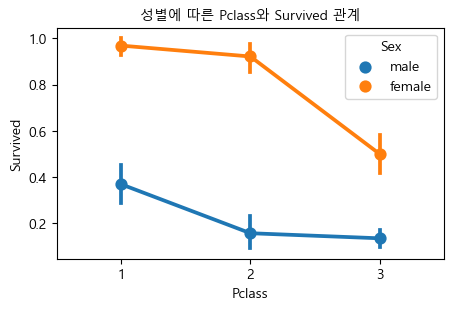

In [13]:
# (pclass ~ survived) by sex
plt.figure(figsize=(5,3))
sns.pointplot(data=df, x='Pclass', y='Survived',hue='Sex')
plt.title('성별에 따른 Pclass와 Survived 관계', fontsize=10)
plt.show()

[해석]
- 남성, 여성 모두 Pclass가 높은 등급(3 < 2 < 1)일수록 생존률이 높음.
- 하지만 여성은 남성보다 생존률이 앞도적으로 높음.
    - Pclass=1인 여성은 생존률이 거의 1로 나타났지만 Pclass=1인 남성은 0.4를 넘지 못함.

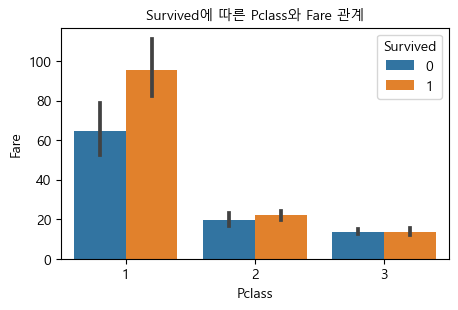

In [14]:
# (fare ~ pclass) by survived
plt.figure(figsize=(5,3))
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title('Survived에 따른 Pclass와 Fare 관계', fontsize=10)
plt.show()

[해석]
- Pclass 등급이 높을수록(3 < 2 < 1) 생존자 수와 Fare 값이 높음.

#### 3) Sex

In [15]:
# 성별 생존자 수
df.groupby(['Sex', 'Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

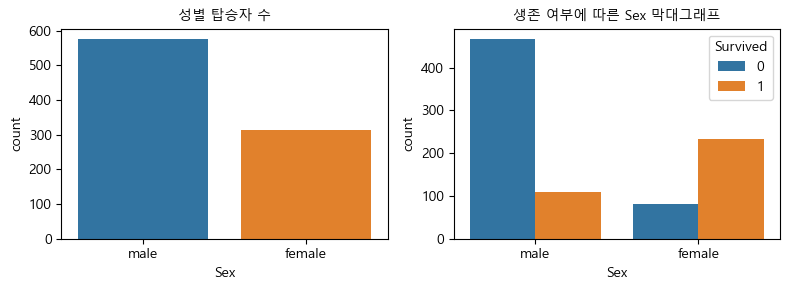

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Sex', ax=ax[0])
ax[0].set_title('성별 탑승자 수', fontsize=10)

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('생존 여부에 따른 Sex 막대그래프', fontsize=10)

plt.tight_layout()
plt.show()

[해석]
- 남성 탑승자 수가 더 많지만 사망자는 남성이 더 많음.

#### 4) Embarked

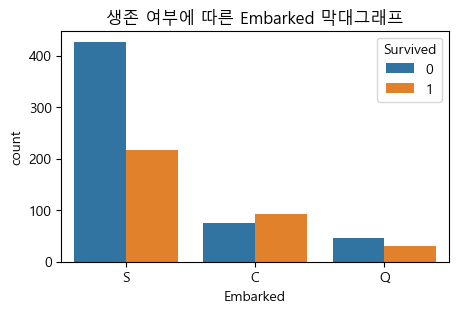

In [17]:
# embarked ~ survived
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('생존 여부에 따른 Embarked 막대그래프')
plt.show()

[해석]
- S 탑승자들이 가장 많음.
- S, Q 탑승자들은 사망자가 더 많았고, C 탑승자들은 생존자가 더 많음.

In [18]:
# Embarked별 생존률
df[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


[해석]
- C 탑승자의 생존률이 상대적으로 가장 높았으며, Q와 S의 생존률은 비슷함.

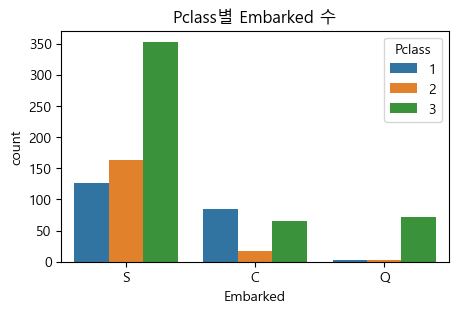

In [19]:
# Embakred ~ Pclass
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='Embarked', hue = 'Pclass')
plt.title('Pclass별 Embarked 수')
plt.show()

#### 5) Fare

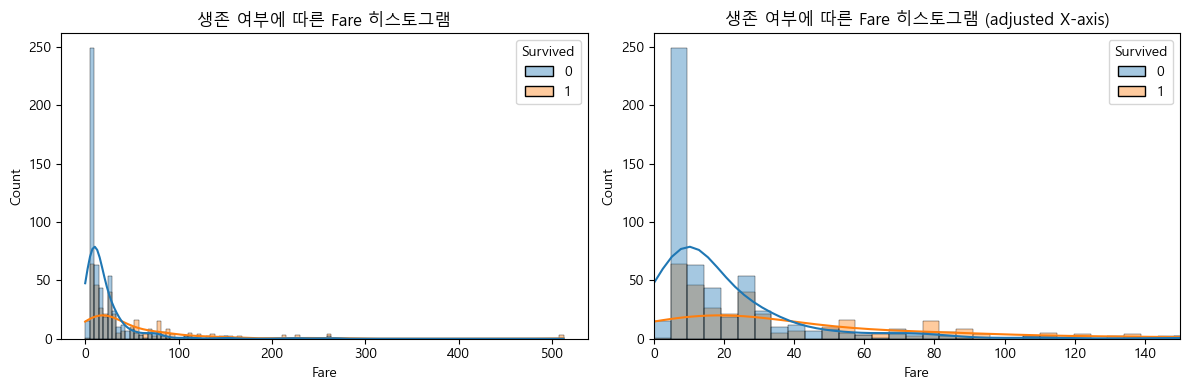

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(data=df, x='Fare', hue='Survived', alpha=.4, kde=True, ax=ax[0])
ax[0].set_title('생존 여부에 따른 Fare 히스토그램')

sns.histplot(data=df, x='Fare', hue='Survived', alpha=.4, kde=True)
ax[1].set_title('생존 여부에 따른 Fare 히스토그램 (adjusted X-axis)')
ax[1].set_xlim(0, 150)

plt.tight_layout()
plt.show()

[해석]
- 생존자, 사망자 모두 20 이하에 집중적으로 분포함. 
- 특히 대부분의 사망자가 대략 5~10 부근에 집중되어 있음.
- 생존자도 마찬가지로 대략 5~10 부근에 집중되어 있음.
- Survived별 Fare의 분포가 어느정도 비슷한 패턴을 보임.

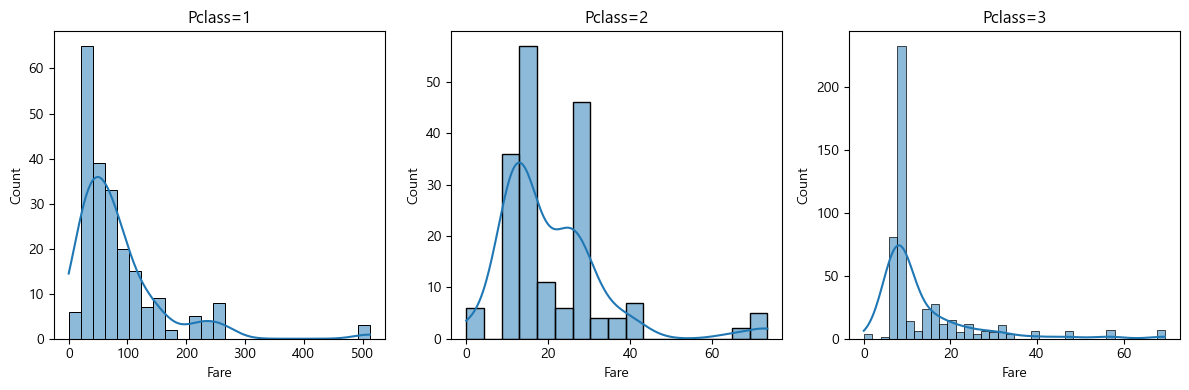

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))

for i in range(3):
    sns.histplot(data=df[df['Pclass']==i+1], x='Fare', kde=True, ax=ax[i])
    ax[i].set_title(f'Pclass={i+1}')

# ax[1].set_title('생존 여부에 따른 Fare 히스토그램 (adjusted X-axis)')
# ax[1].set_xlim(0, 150)

plt.tight_layout()
plt.show()

[해석]
- 상대적으로 Pclass = 1인 사람들이 많은 요금을 지불했음

<정규성 검정>
Pclass 1:
 ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)
Pclass 2:
 ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15)
Pclass 3:
 ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)

<등분산성 검정>
LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)

<일원배치 분산분석>
 F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

<사후 검정>


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-63.4925,-0.0,-72.9165,-54.0685,True
1,3,-70.4791,-0.0,-78.1489,-62.8094,True
2,3,-6.9866,0.108,-15.1064,1.1331,False


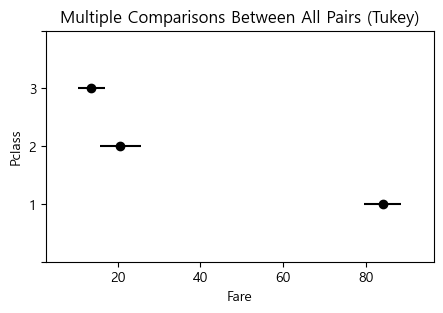

In [22]:
# 일원배치 분산분석(Pclass ~ Fare)
import scipy.stats as stats

# 정규성 검정
pclass_1 = df[df['Pclass']==1]['Fare']
pclass_2 = df[df['Pclass']==2]['Fare']
pclass_3 = df[df['Pclass']==3]['Fare']
print('<정규성 검정>')
print('Pclass 1:\n', stats.shapiro(pclass_1))
print('Pclass 2:\n',stats.shapiro(pclass_2))
print('Pclass 3:\n',stats.shapiro(pclass_3))

# 등분산성 검정
print('\n<등분산성 검정>')
print(stats.levene(pclass_1, pclass_2, pclass_3))

# 일원배치 분산분석
print('\n<일원배치 분산분석>\n', stats.f_oneway(pclass_1, pclass_2, pclass_3))

# 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=df['Fare'], groups=df['Pclass'])
tukeyhsd = mc.tukeyhsd()
print('\n<사후 검정>')
fig = tukeyhsd.plot_simultaneous(figsize=(5, 3))
plt.xlabel('Fare')
plt.ylabel('Pclass')
display(tukeyhsd.summary())

[해석]
- 정규성과 등분산성 가정에 위배되는 결과이지만(p < 0.05) 두 가정을 만족한다는 가정하에 분산분석을 진행함.
- 귀무가설을 기각하여 Pclass에 따라 Fare 값에 차이가 있다고 할 수 있으면 사후 검정을 진행함.
- Pclass 2와 3은 유의한 차이가 없지만 Pclass 2와 1, 그리고 Pclass 3과 1에는 유의한 차이가 있음.

In [23]:
# 크루스칼-왈리스 순위합 검정(Kruskal-Wallis rank sum test)
# 정규성을 만족하지 않은 비모수 분산분석 방법
print('<크루스칼-왈리스 순위합 검정>')
print(stats.kruskal(pclass_1, pclass_2, pclass_3))

<크루스칼-왈리스 순위합 검정>
KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)


[해석]
- 정규성 가정에 위배되었기에, 이때 사용할 수 있는 크루스칼-왈리스 순위합 검정(Kruskal-Wallis rank sum test)으로 분석분석을 진행함.
- p < 0.05이므로 귀무가설을 기각할 수 있음.

In [24]:
# Welch's ANOVA 
# 등분산성 가정을 충족하지 않을 때 사용
import pingouin as pg
import warnings
warnings.filterwarnings(action='ignore')
print("<Welch's ANOVA >")
display(pg.welch_anova(dv = 'Pclass', between = 'Fare', data = df))

<Welch's ANOVA >


,Source,ddof1,ddof2,F,p-unc,np2
0,Fare,247,19436.613995,0.0,1.0,0.976506


[해석]
- 등분산성 가정에 위배되었기에, 이때 사용할 수 있는 Welch's ANOVA 으로 분석분석을 진행함.
- p > 0.05이므로 귀무가설을 기각할 수 없음

#### 6) Parch

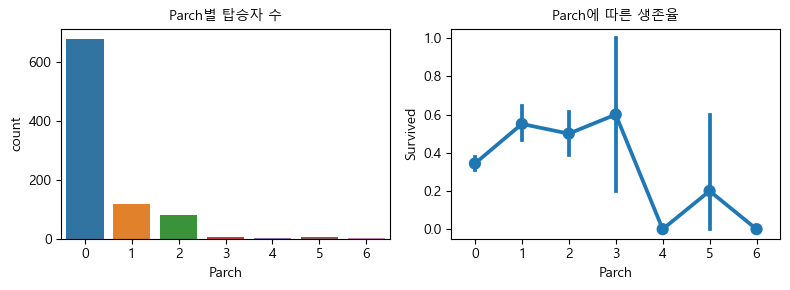

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(data=df, x='Parch', ax=ax[0])
ax[0].set_title('Parch별 탑승자 수', fontsize=10)

sns.pointplot(data=df, x='Parch', y='Survived',ax=ax[1])
ax[1].set_title('Parch에 따른 생존율', fontsize=10)

plt.tight_layout()
plt.show()

[해석]
- 부모, 자녀 없이 혼자 탑승한 사람들이 가장 많음.
- 함께 탑승한 부모, 자녀 수가 4명 이상이면 생존율이 급격히 낮아짐

In [26]:
# Parch별 생존율
df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


#### 7) SibSp

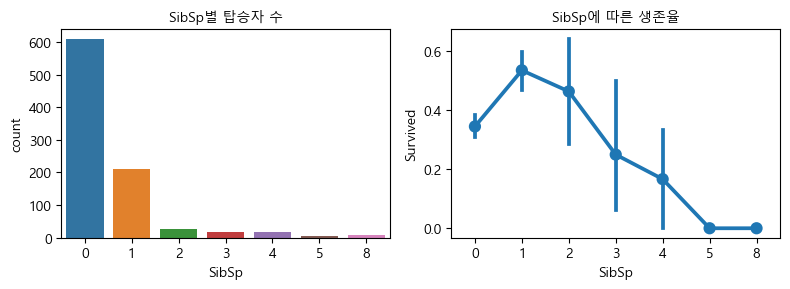

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(data=df, x='SibSp', ax=ax[0])
ax[0].set_title('SibSp별 탑승자 수', fontsize=10)

sns.pointplot(data=df, x='SibSp', y='Survived', ax=ax[1])
ax[1].set_title('SibSp에 따른 생존율', fontsize=10)

plt.tight_layout()
plt.show()

[해석]
- 함께 탑승한 형제 및 배우자 수가 3명 이상일수록 생존률이 낮아짐.

In [28]:
# SibSp별 생존률
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
# Parch ~ SibSp 간 독립성 검정
# 귀무가설: Parch와 SibSp 변수는 서로 독립이다.
# 대립가설: 두 변수는 서로 독립이 아니다.

from scipy.stats import chi2_contingency
table = pd.crosstab(df.Parch, df.SibSp)
chi, p, dff, expect = chi2_contingency(table)
print('<독립성 검정>')
print('Statistic:', chi)
print('p-value:', p)
print('df:', dff)
# print('expect:\n', expect)

<독립성 검정>
Statistic: 341.6819870377193
p-value: 1.7902298345649077e-51
df: 36


[해석]
- p-value < 0.05 이므로 귀무가설을 기각하여 두 변수는 서로 연관성이 있음.

#### 8) Survived

In [30]:
# 사망자 수(0, 549명)가 더 많음
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 9) 상관관계 히트맵

In [31]:
# 상관관계 파악
df_corr = df.corr(method='pearson')
df_corr

,Age,Fare,Parch,Pclass,SibSp,Survived
Age,1.000000,0.096067,-0.189119,-0.369226,-0.308247,-0.077221
Fare,0.096067,1.000000,0.216225,-0.549500,0.159651,0.257307
Parch,-0.189119,0.216225,1.000000,0.018443,0.414838,0.081629
Pclass,-0.369226,-0.549500,0.018443,1.000000,0.083081,-0.338481
SibSp,-0.308247,0.159651,0.414838,0.083081,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000


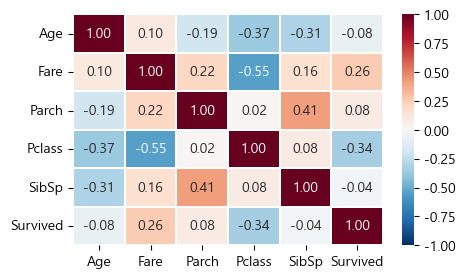

In [32]:
plt.figure(figsize=(5,3))
sns.heatmap(df_corr, annot=True, cmap='RdBu_r', linewidth=.3, vmin=-1, vmax=1, fmt='.2f')
plt.show()

[해석]
1. Fare와 Pclass 간에 상대적으로 높은 음의 상관성 존재(-0.55)
1. Parch와 SibSp 간에 상대적으로 높은 양의 상관성 존재(0.41)
1. Age와 Pcalss 간에 상대적으로 약한 음의 상관성 존재(-0.37)
1. Age, SibSp, Parch와 Survived 사이에는 상관성이 약함.
1. Pclass와 Survived 간에 상대적으로 약한 음의 상관성 존재(-0.34)

### 3. 전처리
- 결측치 대체
- 파생 변수 생성
    - Name
    - Parch + Sibsp + 1(본인) = "Family"
    
    
~~- 범주형 변수 인코딩~~

#### 1) 결측치 대체

**[참고서]**  
**"파이썬을 활용한 머신러닝 쿡북(p.144~145)" - KNN을 이용한 결측값 대체**

In [11]:
# df 다시 설정
df = train[train.columns.difference(['PassengerId', 'Ticket', 'Cabin'])]

# 결측치 확인
df.isna().sum()

Age         177
Embarked      2
Fare          0
Name          0
Parch         0
Pclass        0
Sex           0
SibSp         0
Survived      0
dtype: int64

[해석]  

- 수치형 변수 1개, 범주형 변수 1개씩 결측치 존재함.
- 수치형 변수의 결측치 대체 방법은 (1) 단순대치법, (2) KNN을이용한 결측치 대체가 있음.
    - (1) 단순대치법: 수치형 변수라면 평균과 중앙값으로 대체할 수 있고, 범주형 변수라면 최빈값으로 대체할 수 있음.
    - (2) KNN을 이용한 방법: 수치형 변수로만 가능하며, 결측치가 없는 컬럼들의 최근접 이웃 알고리즘을 이용해 결측치를 대체할 수 있음.
        - 즉, 여러 거리 측정 방식을 기반으로 가장 가까이 있는 k개의 샘플을 이용해 결측치를 대체함.
        - 장점: 머신러닝 기법으로 누락된 값을 예측할 수 있음.
        - 단점: 누락된 값에 가장 가까운 샘플을 구하기 위해 누락된 값과 모든 샘플 사이의 거리를 계산해야 함.

In [12]:
# 수치형 변수 결측치 대체
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만 추출
KNN_data = df[['Age']]

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled= pd.DataFrame(df_filled, columns =KNN_data.columns)
df[KNN_data.columns] = df_filled

# 결측치 확인
df.isna().sum()

Age         0
Embarked    2
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [13]:
# 범주형 변수 결측치 대체
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='most_frequent') # 최빈값으로 대체
categori_data = df[['Embarked']]

df_filled = simple_imputer.fit_transform(categori_data)
df_filled = pd.DataFrame(df_filled, columns=categori_data.columns)
df[categori_data.columns] = df_filled

# 결측치 확인
df.isna().sum()

Age         0
Embarked    0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

#### 2) 파생변수 생성
- Family
- Name_Title

In [14]:
# Family 변수 생성
df['Family'] = df['Parch'] + df['SibSp'] + 1
df.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Family
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,1


In [15]:
# Name_Title 변수 생성
df['Name_Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df.drop(columns=['Name'], inplace=True)
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Family,Name_Title
0,22.0,S,7.2500,0,3,male,1,0,2,Mr
1,38.0,C,71.2833,0,1,female,1,1,2,Mrs
2,26.0,S,7.9250,0,3,female,0,1,1,Miss
3,35.0,S,53.1000,0,1,female,1,1,2,Mrs
4,35.0,S,8.0500,0,3,male,0,0,1,Mr


In [10]:
df['Name_Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Don               1
Mme               1
Capt              1
the Countess      1
Lady              1
Ms                1
Jonkheer          1
Name: Name_Title, dtype: int64

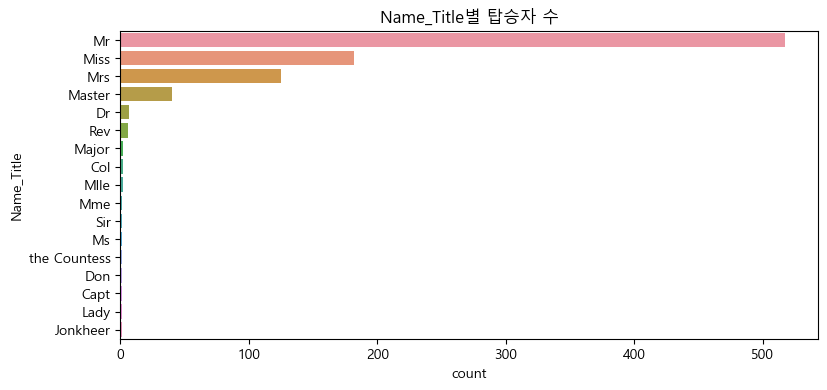

In [124]:
plt.figure(figsize=(9,4))
sns.countplot(data=df, y='Name_Title', order=df['Name_Title'].value_counts().index)
plt.title('Name_Title별 탑승자 수')
plt.show()

In [125]:
df[['Name_Title', 'Survived']].groupby('Name_Title', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Name_Title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


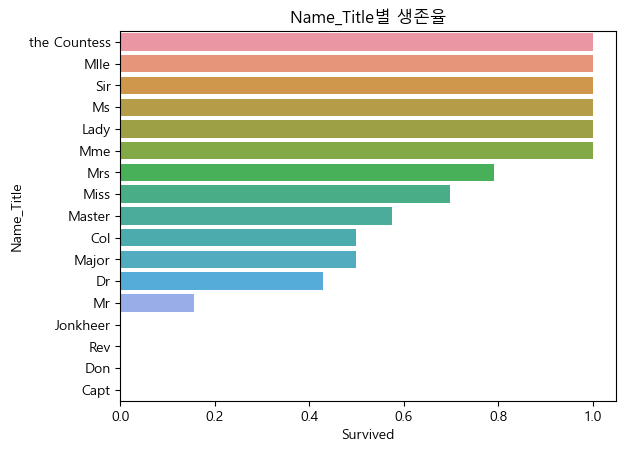

In [126]:
sns.barplot(data=df[['Name_Title', 'Survived']].groupby('Name_Title', as_index=False).mean().sort_values(by='Name_Title', ascending=False),
       y='Name_Title', x='Survived',
           order = list(df[['Name_Title', 'Survived']].groupby('Name_Title', as_index=False).mean().sort_values(by='Survived', ascending=False)['Name_Title'].values))
plt.title('Name_Title별 생존율')
plt.show()

~~#### 3) 범주형 변수 인코딩(더미 변수)~~
~~[해석]~~
~~- 범주형 변수는 Embarked, Sex로 나타났기에 두 변수가 원핫인코딩의 대상임.~~

In [10]:
# # 범주형 변수 확인
# df.select_dtypes(include='object').columns

Index(['Embarked', 'Sex', 'Name_Title'], dtype='object')

In [1]:
# # 더미 변수로 변환
# df = pd.get_dummies(df, columns=['Embarked', 'Sex', 'Name_Title'], drop_first=True)
# df.head()

### 4. 모델 구현

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df.columns

Using TensorFlow backend.


Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Family', 'Name_Title'],
      dtype='object')

In [10]:
# 데이터 분할
X = df[df.columns.difference(['Survived'])]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=0)

# # SMOTE를 이용한 오버 샘플링
# smote = SMOTE()
# X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 9)
(268, 9)
(623,)
(268,)


**[참고서]**  
**"파이썬 라이브러리를 활용한 머신러닝(번역개정판)(p.283)" - ColumnTransformer**

In [11]:
# 연속형 변수
numeric_features = ['Age', 'Fare', 'Family', 'Parch', 'Pclass', 'SibSp']

# 범주형 변수
categorical_features = df[df.columns.difference(['Age', 'Fare', 'Family', 'Parch', 'Pclass', 'SibSp', 'Survived'])].columns

# ColumnTransformer를 사용하여 연속형 변수와 범주형 변수에 각각 변환기를 적용
columm_transformer = ColumnTransformer([
        ('num', StandardScaler(), numeric_features), # 스케일링
        ('cat', OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_features) # 원핫인코딩(더미변수)
])

**[참고서]**  
**"파이썬 머신러닝 완벽가이드 개정2판(p.111~115)" - GridSearchCV**

In [66]:
# LogisticRegression

## 연속형 & 범주형 데이터 전처리와 모델 학습하는 파이프라인 만들기
log = Pipeline([('preprocessor', columm_transformer),
                ('log', LogisticRegression(random_state=2023, solver='liblinear'))])

## GridSearchCV(교차 검증 + 최적 하이퍼 파라미터 튜닝)
param_grid = {'log__C': [0.001, 0.01, 0.1, 1, 10],
              'log__penalty': ['l1', 'l2']}

grid = GridSearchCV(estimator=log, cv=5, param_grid = param_grid, scoring ='accuracy')
grid.fit(X_train, y_train)

scores_df = pd.DataFrame(grid.cv_results_) # GridSearchCV 결과를 데이터프레임으로 변환
display(scores_df.sort_values(by='mean_test_score', ascending=False).head(5)) # 상위 5개 추출
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ',grid.best_params_)

## GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid.best_estimator_

## GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터의 정확도:', accuracy_score(y_test, pred))

## classification report 출력
from sklearn.metrics import classification_report
print('classification report:\n',classification_report(y_test, pred))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_log__C,param_log__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.015973,0.000906,0.007124,0.000808,1,l1,"{'log__C': 1, 'log__penalty': 'l1'}",0.816,0.832,0.824,0.822581,0.830645,0.825045,0.005809,1
8,0.029927,0.005804,0.007643,0.003008,10,l1,"{'log__C': 10, 'log__penalty': 'l1'}",0.808,0.832,0.832,0.822581,0.822581,0.823432,0.008791,2
9,0.020711,0.002620,0.009174,0.002922,10,l2,"{'log__C': 10, 'log__penalty': 'l2'}",0.816,0.832,0.832,0.822581,0.814516,0.823419,0.007514,3
7,0.018624,0.006170,0.008576,0.002239,1,l2,"{'log__C': 1, 'log__penalty': 'l2'}",0.824,0.832,0.832,0.814516,0.814516,0.823406,0.007825,4
5,0.012386,0.000471,0.006815,0.000778,0.1,l2,"{'log__C': 0.1, 'log__penalty': 'l2'}",0.816,0.824,0.832,0.798387,0.806452,0.815368,0.011995,5


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'log__C': 1, 'log__penalty': 'l1'}
테스트 데이터의 정확도: 0.8208955223880597
classification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       165
           1       0.83      0.67      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [85]:
# SVC

## 연속형 & 범주형 데이터 전처리와 모델 학습하는 파이프라인 만들기
svc = Pipeline([('preprocessor', columm_transformer),
                ('svc', SVC(random_state=2023))])

## GridSearchCV(교차 검증 + 최적 하이퍼 파라미터 튜닝)
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10],
              'svc__gamma': ['scale', 'auto']}

grid = GridSearchCV(estimator=svc, cv=5, scoring='accuracy', param_grid=param_grid)
grid.fit(X_train, y_train)

scores_df = pd.DataFrame(grid.cv_results_) # GridSearchCV 결과를 데이터프레임으로 변환
display(scores_df.sort_values('mean_test_score', ascending=False).head())
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ',grid.best_params_)

## GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid.best_estimator_

## GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터의 정확도:', accuracy_score(y_test, pred))

## classification report 출력
from sklearn.metrics import classification_report
print('classification report:\n',classification_report(y_test, pred))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.023759,0.000429,0.007806,0.000384,10,auto,"{'svc__C': 10, 'svc__gamma': 'auto'}",0.800,0.856,0.824,0.822581,0.838710,0.828258,0.018589,1
7,0.022631,0.002220,0.008380,0.000486,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.816,0.856,0.816,0.830645,0.822581,0.828245,0.014887,2
6,0.027879,0.006857,0.009779,0.002381,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.808,0.840,0.824,0.822581,0.830645,0.825045,0.010514,3
4,0.026719,0.002478,0.010858,0.001860,0.1,scale,"{'svc__C': 0.1, 'svc__gamma': 'scale'}",0.800,0.824,0.832,0.814516,0.822581,0.818619,0.010837,4
5,0.039940,0.008503,0.018096,0.008432,0.1,auto,"{'svc__C': 0.1, 'svc__gamma': 'auto'}",0.784,0.840,0.824,0.806452,0.790323,0.808955,0.020815,5


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'svc__C': 10, 'svc__gamma': 'auto'}
테스트 데이터의 정확도: 0.835820895522388
classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       165
           1       0.84      0.71      0.77       103

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.83       268



In [12]:
# RandomForestClassifier

## 연속형 & 범주형 데이터 전처리와 모델 학습하는 파이프라인 만들기
rf = Pipeline([('preprocessor', columm_transformer),
                ('rf', RandomForestClassifier(random_state=2023))])

## GridSearchCV(교차 검증 + 최적 하이퍼 파라미터 튜닝)
param_grid = {'rf__max_depth': [3, 5, 7],
              'rf__min_samples_split': [3, 4, 5],
              'rf__n_estimators': [100, 200, 300]}

grid = GridSearchCV(estimator=rf, cv=5, scoring='accuracy', param_grid=param_grid)
grid.fit(X_train, y_train)

scores_df = pd.DataFrame(grid.cv_results_) # GridSearchCV 결과를 데이터프레임으로 변환
display(scores_df.sort_values('mean_test_score', ascending=False).head())
print('최적의 성능을 보일 때의 파라미터(mean_test_score 기준): ',grid.best_params_)

## GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid.best_estimator_

## GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터의 정확도:', accuracy_score(y_test, pred))

## classification report 출력
from sklearn.metrics import classification_report
print('classification report:\n',classification_report(y_test, pred))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__min_samples_split,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.388480,0.595928,0.183616,0.199593,5,5,300,"{'rf__max_depth': 5, 'rf__min_samples_split': ...",0.816,0.848,0.824,0.814516,0.830645,0.826632,0.012161,1
13,0.424659,0.029863,0.031714,0.003700,5,4,200,"{'rf__max_depth': 5, 'rf__min_samples_split': ...",0.816,0.848,0.816,0.814516,0.830645,0.825032,0.012906,2
21,0.225934,0.003776,0.019116,0.000404,7,4,100,"{'rf__max_depth': 7, 'rf__min_samples_split': ...",0.824,0.840,0.816,0.798387,0.846774,0.825032,0.017259,2
15,0.199068,0.007842,0.018152,0.000746,5,5,100,"{'rf__max_depth': 5, 'rf__min_samples_split': ...",0.816,0.848,0.816,0.814516,0.830645,0.825032,0.012906,2
14,0.637675,0.052118,0.046277,0.003920,5,4,300,"{'rf__max_depth': 5, 'rf__min_samples_split': ...",0.816,0.848,0.816,0.814516,0.830645,0.825032,0.012906,2


최적의 성능을 보일 때의 파라미터(mean_test_score 기준):  {'rf__max_depth': 5, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}
테스트 데이터의 정확도: 0.8432835820895522
classification report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       165
           1       0.85      0.72      0.78       103

    accuracy                           0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



### 5. test 데이터 전처리

In [13]:
# test 데이터 불러오기
test = pd.read_csv('C:/Users/user/Desktop/Python/adp/kaggle/data/titanic/test.csv')

# 필요없는 컬럼 제거
test = test.drop(columns=['PassengerId', 'Ticket', 'Cabin']) 
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [54]:
test.isna().sum() # 결측값 확인

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [15]:
# 결측치 대체
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만 추출
KNN_data = test[['Age', 'Fare']]

# 모델링
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)
test[KNN_data.columns] = df_filled

# 결측치 확인
test.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
# Name Title 추출
name_title = []
for i in range(418):
    name_title.append(test.loc[i, 'Name'].split(', ')[1].split('. ')[0])
    
# Name_Title 변수 생성
test['Name_Title'] = name_title

# Family 변수 생성
test['Family'] = 1+ test['SibSp'] + test['Parch']
test.drop(columns=['Name'], inplace=True)

# 확인
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title,Family
0,3,male,34.5,0,0,7.8292,Q,Mr,1
1,3,female,47.0,1,0,7.0000,S,Mrs,2
2,2,male,62.0,0,0,9.6875,Q,Mr,1
3,3,male,27.0,0,0,8.6625,S,Mr,1
4,3,female,22.0,1,1,12.2875,S,Mrs,3


### 6. 실제 값 예측

In [17]:
# submission data 불러오기
submission = pd.read_csv('C:/Users/user/Desktop/Python/adp/kaggle/data/titanic/gender_submission.csv')
display(submission.head())
print(submission.shape)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


(418, 2)


In [18]:
# 앞서 구축한 모델로 y_test 값 예측
pred = estimator.predict(test)

# pred 값 대입
submission['Survived'] = pred

# 확인
submission.head()

# 데이터 저장
submission.to_csv('C:/Users/user/Desktop/Python/adp/kaggle/data/titanic/result1.csv', index=False)

---
**[파이썬 한권으로 끝내기] 제3회 기출동형 모의고사 문제 활용**

### 1: 데이터 불균형을 시각화하여 불균형 판단 근거를 작성하시오.

In [22]:
adp_df = df.copy()
adp_df = pd.get_dummies(data=adp_df, columns=['Embarked','Sex','Name_Title'], drop_first=True)
adp_df.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Family,Embarked_Q,Embarked_S,Sex_male,...,Name_Title_Master,Name_Title_Miss,Name_Title_Mlle,Name_Title_Mme,Name_Title_Mr,Name_Title_Mrs,Name_Title_Ms,Name_Title_Rev,Name_Title_Sir,Name_Title_the Countess
0,22.0,7.2500,0,3,1,0,2,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,0,1,1,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,7.9250,0,3,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,0,1,1,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,8.0500,0,3,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
adp_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

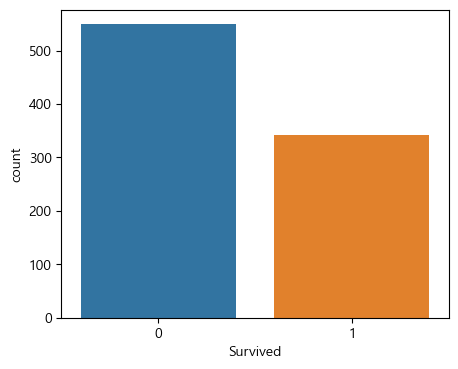

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=adp_df, x='Survived');

[해석]
- 0의 개수가 549이고, 1의 개수가 342으로 나타났기에 데이터 불균형을 의심할 수 있음.

### 2. 언더샘플링, 오버샘플링의 장단점을 설명하고, 둘 중 하나를 선택하고 선택한 이유를 밝히시오.

[언더샘플링]
- 다수의 레이블을 가진 데이터를 소수의 데이터세트가 가진 레이블의 수 수준으로 감소하는 기법임.
- 데이터 불균형 문제를 피할 수 있지만 데이터 수가 급격히 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있음.

[오버샘플링]
- 소수의 레이블을 가진 데이터를 다수의 데이터세트가 가진 레이블의 수 수준으로 증가 시키는 기법임.
- 데이터 손실이 없고, 언더 샘플링에 비해 높은 정확도를 보이지만 과적합 문제가 발생할 수 있음.

따라서 본 분석에서는 데이터 정소 손실의 우려를 피하기 위해 오버샘플링 기법을 적용함.

### 3. 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [46]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X = adp_df.drop(columns=['Survived'])
y = adp_df.Survived

rm_sampler = RandomOverSampler()
smote = SMOTE()

X_rm, y_rm = rm_sampler.fit_resample(X, y)
X_sm, y_sm = smote.fit_resample(X, y)

print('<<랜덤오버샘플링>>')
print(pd.Series(y_rm).value_counts())
print('\n<smote>>')
print(pd.Series(y_sm).value_counts())

<<랜덤오버샘플링>>
1    549
0    549
dtype: int64

<smote>>
1    549
0    549
dtype: int64


[해석]
- 원본 X, y 데이터와 랜덤 오버 샘플링을 적용한 X_rm, y_rm, 그리고 SMOTE를 적용한 X_rm, y_rm 데이터 세트를 생성함.
- 오버 샘플링한 y의 클래스 개수를 살펴보면 각각 549개로 1 값이 증가한 것을 알 수 있음.

### 4. 앞서 만든 3개 데이터 세트를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [60]:
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 원본 데이터
start_time = time.time()
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100).fit(X_trian, y_train)
pred = rf_clf.predict(X_test)
print('원본 데이터 정확도: ', accuracy_score(pred, y_test))
print(classification_report(pred, y_test))
print('원본 데이터 수행 속도: {} 초'.format(time.time()-start_time))

# 랜덤 오버 샘플링
start_time = time.time()
X_trian_rm, X_test_rm, y_train_rm, y_test_rm = train_test_split(X_rm, y_rm, test_size=0.3, random_state=1)
rf_clf_rm = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100).fit(X_trian_rm, y_train_rm)
pred_rm = rf_clf_rm.predict(X_test_rm)
print('\n랜덤 오버 샘플링 데이터 정확도: ', accuracy_score(pred_rm, y_test_rm))
print(classification_report(pred_rm, y_test_rm))
print('랜덤 오버 샘플링 데이터 수행 속도: {} 초'.format(time.time()-start_time))

# SMOTE 기법
start_time = time.time()
X_trian_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=1)
rf_clf_sm = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100).fit(X_trian_sm, y_train_sm)
pred_sm = rf_clf_sm.predict(X_test_sm)
print('\nSMOTE 데이터 정확도: ', accuracy_score(pred_sm, y_test_sm))
print(classification_report(pred_sm, y_test_sm))
print('SMOTE 수행 속도: {} 초'.format(time.time()-start_time))

원본 데이터 정확도:  0.7873134328358209
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       176
           1       0.65      0.82      0.72        92

    accuracy                           0.79       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.81      0.79      0.79       268

원본 데이터 수행 속도: 0.28822875022888184 초

랜덤 오버 샘플링 데이터 정확도:  0.8424242424242424
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       149
           1       0.87      0.84      0.85       181

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

랜덤 오버 샘플링 데이터 수행 속도: 0.3899548053741455 초

SMOTE 데이터 정확도:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       170
           1       0.80      0.88      0.84       1

[해석]
- 정확도 측면에서 랜덤 오버 샘플링 데이터의 모델 정확도가 약 0.845로 가장 높음.
- 속도 측면에서는 오버 샘플링을 하지 않은 원본 데이터의 속도가 가장 빠름. 이는 원본 데이터가 오버 샘플링 데이터들에 비해 사이즈가 작기 때문임.
- 이 점을 감안한다면 랜덤 오버 샘플링과 SMOTE의 모델 간 수행 속도에 큰 차이가 없으므로 정확도가 더 높은 랜덤 오버 샘플링을 적용한 모델을 사용하기로 결정함.

### 5. 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해서 작성하시오.
[해석]
- 오버 샘플링을 통해 데이터 불균형 문제를 해결했으므로 원본 데이터의 모델 성능보다 향상된 것을 확인할 수 있음.
- 원본 데이터의 경우, test 데이터 y값이 0일 때의 f1-score와 1일 때의 f1-score에 차이가 존재함. 이는 정밀도와 재현율에서도 확인할 수 있음. 이처럼 불균형한 데이터로 학습한 예측 모델은 일반화에 어려움이 있음.
- 하지만 오버 샘플링을 진행한 모델의 test 데이터 성능 대부분은 train 성능과 비슷하므로 데이터 학습 시 과적합이 발생하지 않았다는 것을 알 수 있음. 데이터 불균형 문제를 전처리 과정에서 극복했기 때문임. 따라서 오버 샘플링 처리를 한 예측 모델은 일반화가 가능하다고 판단되므로 실제 분석 환경에서 사용할 수 있음.

---
**[파이썬 한권으로 끝내기] 제4회 기출동형 모의고사 문제 활용**

### 1. Kmeans, DBSCAN 등의 방법으로 군집을 생성하시오.

In [17]:
# 범주형 변수 더미 변수화 + 불필요한 변수 제거
ex_df = pd.get_dummies(data=df.drop(columns=['Name_Title', 'Survived'], axis=1), drop_first=True)
ex_df.head()

,Age,Fare,Parch,Pclass,SibSp,Family,Embarked_Q,Embarked_S,Sex_male
0,22.0,7.2500,0,3,1,2,0,1,1
1,38.0,71.2833,0,1,1,2,0,0,0
2,26.0,7.9250,0,3,0,1,0,1,0
3,35.0,53.1000,0,1,1,2,0,1,0
4,35.0,8.0500,0,3,0,1,0,1,1


In [18]:
# 연속형 변수 스케일링
from sklearn.preprocessing import StandardScaler

scaled_df = ex_df[['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family']]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family'])

# 스케일링한 연속형 변수 데이터와 범주형 변수 데이터 합치기
ex_df = pd.concat([scaled_df, ex_df[['Embarked_Q', 'Embarked_S', 'Sex_male']]], axis=1)
ex_df.head()

,Age,Fare,Parch,Pclass,SibSp,Family,Embarked_Q,Embarked_S,Sex_male
0,-0.592481,-0.502445,-0.473674,0.827377,0.432793,0.059160,0,1,1
1,0.638789,0.786845,-0.473674,-1.566107,0.432793,0.059160,0,0,0
2,-0.284663,-0.488854,-0.473674,0.827377,-0.474545,-0.560975,0,1,0
3,0.407926,0.420730,-0.473674,-1.566107,0.432793,0.059160,0,1,0
4,0.407926,-0.486337,-0.473674,0.827377,-0.474545,-0.560975,0,1,1


In [20]:
# 클러스터별 콜린스키 하라바츠 결과 비교
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(ex_df)
    labels = kmeans_model.labels_
    print(calinski_harabasz_score(ex_df, labels))

333.91548043961143
357.27702844796414
325.3205008936358
321.49871752719963
300.1063097731906
279.9971162269085
275.8561600901945
264.2815603336369


[해석]
- 콜린스키 하라바츠 스코어 결과 k 값이 3일 때 가장 높은 값을 갖는 것으로 확인했지만, 콜린스키 하라바츠 스코어만을 가지고 k값을 확정짓기 어려움.
- 따라서 분산에 대한 검정뿐 아니라 SSE의 증감을 보는 엘보우 기법을 사용하여 적절한 K의 값을 추가로 확인하는 것이 좋음.

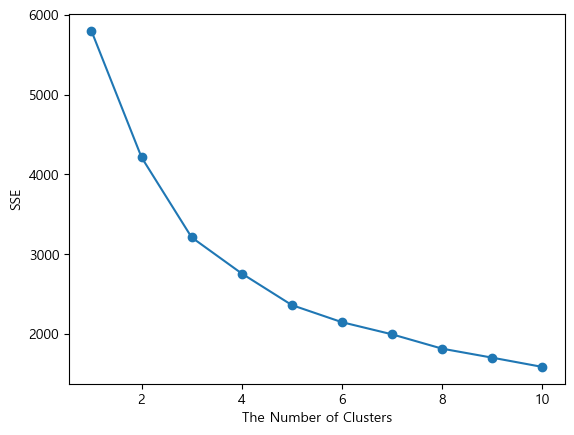

[5797.319865319862, 4214.369220689454, 3212.384642035419, 2760.2409996872, 2364.8423259932065, 2150.7274063288387, 1998.7774356732778, 1819.135023304147, 1706.5438079027276, 1590.6968133133073]


In [21]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
    
elbow(ex_df)

[해석]
- 2에서 3으로 갈 때에 기울기 소실이 발생하므로, 해당 데이터에서는 2~3개의 군집이 적절함을 알 수 있음.
- 따라서 k=3으로 하여 최종 군집 분석을 진행함.

In [28]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(ex_df)

# 할당된 군집을 df 데이터에 추가
new_labels= km.labels_
df['cluster']=new_labels

df.groupby(['cluster']).mean()

,Age,Fare,Parch,Pclass,SibSp,Survived,Family
cluster,,,,,,,
0,39.460471,70.122147,0.273859,1.145228,0.360996,0.585062,1.634855
1,18.738471,55.030670,2.081395,2.604651,2.872093,0.313953,5.953488
2,27.199347,12.521054,0.168440,2.760638,0.234043,0.308511,1.402482
